# 연령별 취업자수 관계

- 국가통계포털에서 <mark>행정구역(시도)/성/연령별 취업자</mark> 데이터 다운로드
- 전처리하기
<hr>
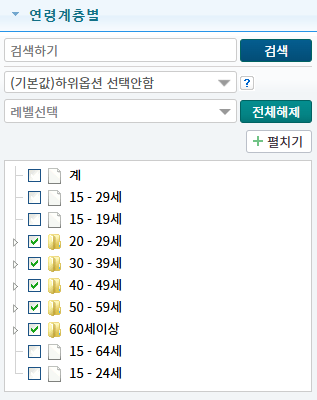

In [1]:
import pandas as pd
import matplotlib
import matplotlib as rc
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [ ]:
import matplotlib 
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.font_manager as fm
fontlist=fm.findSystemFonts(fontpaths=None, fontext='ttf')
fontlist

Text(0.3, 0.3, '한글')

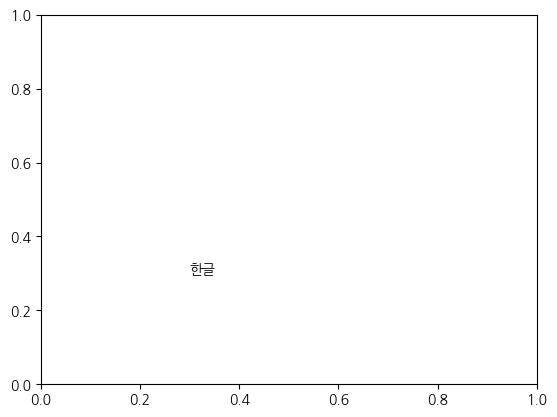

In [5]:
# 윈도우용 폰트 경로 설정
path="C:\\Windows\\Fonts\\NanumGothic.ttf"
font_name = fm.FontProperties(fname=path).get_name()
rc('font',family=font_name)
plt.text(0.3,0.3,'한글')

In [7]:
import pandas as pd
file_path = "./ref/행정구역시도성연령별취업자_20250304.csv"
ori = pd.read_csv(file_path,encoding="EUC-KR")
ori.head()

,시도별,시점,연령계층별,성별,데이터
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773


In [20]:
ex_data = ori.copy()
ex_data.columns = ['resion', 'year', 'age', 'gender', 'value']
# ex_data['value'] = pd.to_numeric(ex_data['value'], errors='coerce')  # 숫자로 변환, 오류 발생 시 NaN으로 처리
# ex_data['value'] = ex_data['value'].fillna(0)  # NaN 값을 0으로 채움
# ex_data['value'] = ex_data['value'].astype(int)  # 'value' 열을 정수형으로 변환
# result = ex_data.groupby('year')['value'].sum()  # 연도별로 'value' 값 합계 계산
# print(result)
ex_data.loc[ex_data['resion']=='세종특별자치시','value']=ex_data.loc[ex_data['resion']=='세종특별자치시']['value'].replace('-',0)
ex_data

,resion,year,age,gender,value
0,서울특별시,2014.1/4,20 - 29세,남자,331
1,서울특별시,2014.1/4,20 - 29세,여자,460
2,서울특별시,2014.1/4,30 - 39세,남자,774
3,서울특별시,2014.1/4,30 - 39세,여자,519
4,서울특별시,2014.1/4,40 - 49세,남자,773
...,...,...,...,...,...
7435,제주도,2024.4/4,40 - 49세,여자,44
7436,제주도,2024.4/4,50 - 59세,남자,54
7437,제주도,2024.4/4,50 - 59세,여자,47
7438,제주도,2024.4/4,60세이상,남자,49


In [26]:
ex_data['value'] = ex_data['value'].astype(int)  
ex1_data=ex_data.groupby('year')['value'].sum().reset_index(name='total')

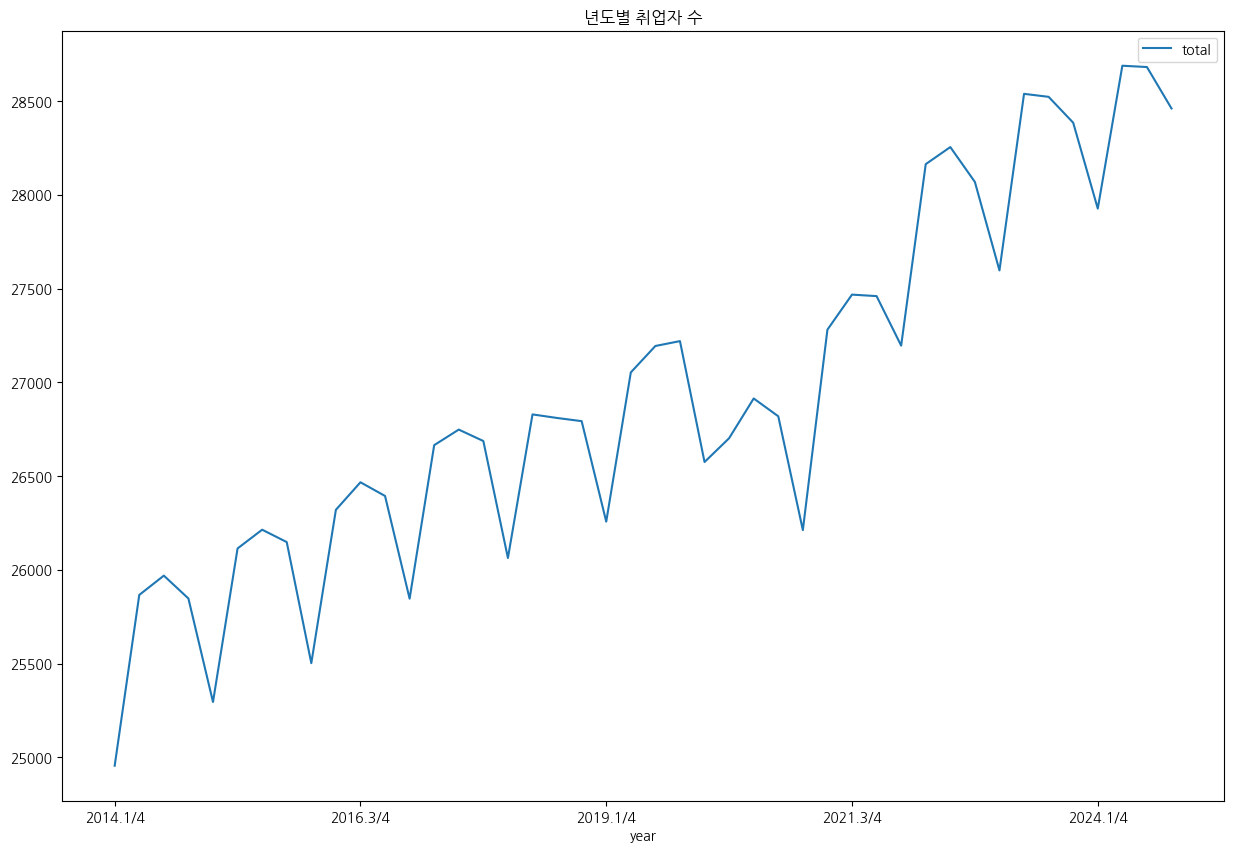

In [27]:
ex1_data.plot(x='year', y='total', figsize=(15,10), title="년도별 취업자 수")
plt.show()